In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [21]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
X = pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
Y=pd.Series(boston['target'],name='Target')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.4, random_state=50)

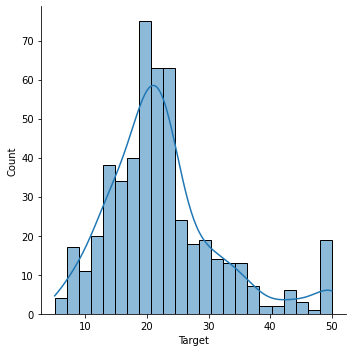

In [24]:
sns.displot(Y,kde=True)

In [25]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

In [29]:
lm.intercept_

23.60325774632329

In [30]:
lm.coef_

array([-4.60711399e-02,  2.93002379e-02,  2.70027380e-02,  2.43692672e+00,
       -1.66055525e+01,  5.17143173e+00, -2.93591868e-03, -1.26576601e+00,
        2.47957953e-01, -1.18375483e-02, -8.78944949e-01,  1.14716375e-02,
       -4.37309044e-01])

In [31]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
lm_df = pd.DataFrame(lm.coef_,index=boston['feature_names'],columns=['Coeff'])

In [35]:
lm_df

,Coeff
CRIM,-0.046071
ZN,0.029300
INDUS,0.027003
CHAS,2.436927
NOX,-16.605552
RM,5.171432
AGE,-0.002936
DIS,-1.265766
RAD,0.247958
TAX,-0.011838


<h2>Predictions</h2>

In [36]:
predicts=lm.predict(X_test)

In [38]:
predicts[:5]

array([ 9.34263907, 25.1346256 , 19.94252949, 27.67229605, 22.38546923])

<AxesSubplot:ylabel='Target'>

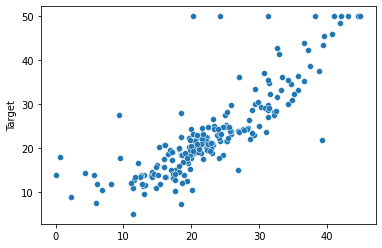

In [46]:
sns.scatterplot(x=predicts,y=y_test)

In [47]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
313,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90
461,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5.0,403.0,14.7,353.89,6.43
333,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68


<h3>If following were the details for a given house</h3>

In [69]:
x_try=list([5,0,19,0,0.7,4.2,67,2.0,25,654,20.1,333,7.34])

In [82]:
x_try.reshape(1,-1)

array([[  5.  ,   0.  ,  19.  ,   0.  ,   0.7 ,   4.2 ,  67.  ,   2.  ,
         25.  , 654.  ,  20.1 , 333.  ,   7.34]])

In [80]:
try_predict = lm.predict(x_try.reshape(1,-1))

In [83]:
try_predict[0]

12.654447691115156

<h3>It will cost approx 12,650 dollars </h3>